In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [2]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from IPython import display
from wordcloud import WordCloud
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


# Read Data

In [3]:
df=pd.read_csv("/content/drive/MyDrive/upwork/salaries_cyber.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


# EDA 

In [4]:
len(df)

1247

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Data Peprocessing

In [8]:
df.experience_level.unique()

array(['EN', 'MI', 'EX', 'SE'], dtype=object)

In [9]:
df['experience_level'].replace(['EN', 'MI', 'EX', 'SE'],
                        [1,2,3,4], inplace=True)

In [10]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [11]:
df['employment_type'].replace(['FT', 'CT', 'PT', 'FL'],
                        [1,2,3,4], inplace=True)

In [12]:
df.job_title.unique()

array(['Cyber Program Manager', 'Security Analyst', 'IT Security Analyst',
       'Cyber Security Analyst', 'Application Security Architect',
       'Security Researcher', 'Information Security Compliance Analyst',
       'Information Security Compliance Manager', 'Security Specialist',
       'Application Security Specialist', 'Cyber Security Consultant',
       'Head of Information Security',
       'Security Incident Response Engineer', 'Ethical Hacker',
       'Chief Information Security Officer', 'DevSecOps Engineer',
       'IT Security Manager', 'Application Security Engineer',
       'Vulnerability Analyst', 'Cyber Security Engineer',
       'Information Security Analyst',
       'Principal Application Security Engineer',
       'Cyber Security Architect', 'Information Security Manager',
       'SOC Analyst', 'Penetration Tester',
       'Cyber Threat Intelligence Analyst', 'Cloud Security Engineer',
       'Information Security Officer', 'Security Consultant',
       'Informat

In [13]:
df.salary_currency.unique()

array(['USD', 'BRL', 'GBP', 'EUR', 'INR', 'CAD', 'CHF', 'DKK', 'SGD',
       'AUD', 'SEK', 'MXN', 'ILS', 'PLN', 'NOK', 'IDR', 'NZD', 'HUF',
       'ZAR', 'TWD', 'RUB'], dtype=object)

In [14]:
len(df.salary_currency.unique())

21

In [15]:
df['salary_currency'].replace(['USD', 'BRL', 'GBP', 'EUR', 'INR', 'CAD', 'CHF', 'DKK', 'SGD',
       'AUD', 'SEK', 'MXN', 'ILS', 'PLN', 'NOK', 'IDR', 'NZD', 'HUF',
       'ZAR', 'TWD', 'RUB'],
                        [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)

In [16]:
df.employee_residence.unique()

array(['US', 'BR', 'BW', 'GB', 'TW', 'NL', 'IN', 'DE', 'AE', 'CA', 'CH',
       'DK', 'CL', 'ES', 'SG', 'AU', 'FR', 'IT', 'PK', 'GR', 'GH', 'AZ',
       'RO', 'AR', 'DZ', 'AF', 'SI', 'HR', 'SE', 'HU', 'ET', 'MX', 'IL',
       'IE', 'PL', 'CR', 'JP', 'PT', 'NG', 'NO', 'CZ', 'ID', 'EE', 'KG',
       'KE', 'BG', 'IR', 'NZ', 'BE', 'ZA', 'AT', 'LU', 'EG', 'VN', 'SA',
       'LT', 'RU', 'TR'], dtype=object)

In [17]:
len(df.employee_residence.unique())

58

In [18]:
df.company_location.unique()

array(['US', 'BR', 'BW', 'GB', 'SG', 'NL', 'IN', 'DE', 'AE', 'CA', 'CH',
       'DK', 'CL', 'ES', 'AU', 'FR', 'IT', 'JP', 'GR', 'AZ', 'RO', 'DZ',
       'AQ', 'AX', 'SI', 'HR', 'SE', 'HU', 'ET', 'MX', 'IL', 'IE', 'PK',
       'NO', 'PL', 'PT', 'RU', 'CZ', 'ID', 'EE', 'KE', 'RS', 'AR', 'NZ',
       'BE', 'ZA', 'AT', 'UM', 'LU', 'EG', 'TW', 'VN', 'SA', 'AF', 'TR'],
      dtype=object)

In [19]:
df.company_size.unique()

array(['S', 'M', 'L'], dtype=object)

In [20]:
df['company_size'].replace(['S', 'M', 'L'],
                        [1,2,3], inplace=True)

In [21]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,1,1,Cyber Program Manager,63000,1,63000,US,50,US,1
1,2022,2,1,Security Analyst,95000,1,95000,US,0,US,2
2,2022,2,1,Security Analyst,70000,1,70000,US,0,US,2
3,2022,2,1,IT Security Analyst,250000,2,48853,BR,50,BR,3
4,2022,1,2,Cyber Security Analyst,120000,1,120000,BW,100,BW,1
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,2,1,Cyber Security Analyst,140000,10,96422,AU,50,AU,2
1243,2021,4,1,Information Security Manager,60000,3,82528,GB,50,GB,3
1244,2021,4,1,Penetration Testing Engineer,126000,1,126000,US,100,US,3
1245,2021,2,1,Information Security Analyst,42000,3,57769,GB,100,GB,3


# Correlation between columns

In [22]:
df.corr()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,remote_ratio,company_size
work_year,1.000000,0.121597,-0.040067,0.027042,-0.180097,0.184246,0.135720,-0.179436
experience_level,0.121597,1.000000,-0.058977,0.030802,-0.068033,0.430037,0.163372,-0.019455
employment_type,-0.040067,-0.058977,1.000000,-0.004027,0.068266,-0.078192,0.015286,-0.080650
salary,0.027042,0.030802,-0.004027,1.000000,0.157943,-0.033166,0.019112,0.019995
salary_currency,-0.180097,-0.068033,0.068266,0.157943,1.000000,-0.252665,-0.080803,-0.037337
salary_in_usd,0.184246,0.430037,-0.078192,-0.033166,-0.252665,1.000000,0.174523,0.069485
remote_ratio,0.135720,0.163372,0.015286,0.019112,-0.080803,0.174523,1.000000,0.030295
company_size,-0.179436,-0.019455,-0.080650,0.019995,-0.037337,0.069485,0.030295,1.000000


# Selecting the columns with positive Correlation

In [23]:
finaldf=df[['work_year','experience_level','remote_ratio','company_size','salary_in_usd']]
finaldf

,work_year,experience_level,remote_ratio,company_size,salary_in_usd
0,2022,1,50,1,63000
1,2022,2,0,2,95000
2,2022,2,0,2,70000
3,2022,2,50,3,48853
4,2022,1,100,1,120000
...,...,...,...,...,...
1242,2020,2,50,2,96422
1243,2021,4,50,3,82528
1244,2021,4,100,3,126000
1245,2021,2,100,3,57769


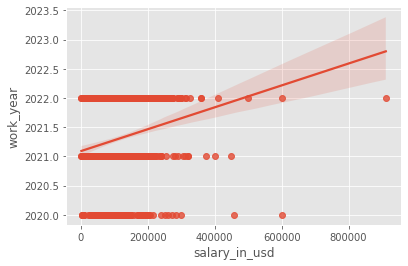

In [24]:
sns.regplot(x=finaldf['salary_in_usd'],y=finaldf['work_year'])

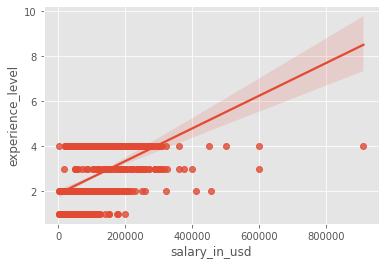

In [25]:
sns.regplot(x=finaldf['salary_in_usd'],y=finaldf['experience_level'])

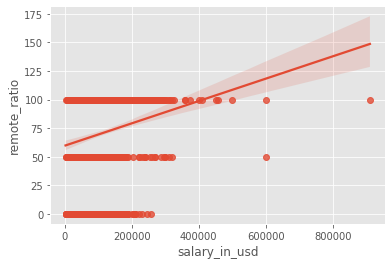

In [26]:
sns.regplot(x=finaldf['salary_in_usd'],y=finaldf['remote_ratio'])

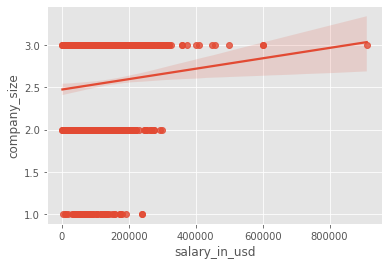

In [27]:
sns.regplot(x=finaldf['salary_in_usd'],y=finaldf['company_size'])

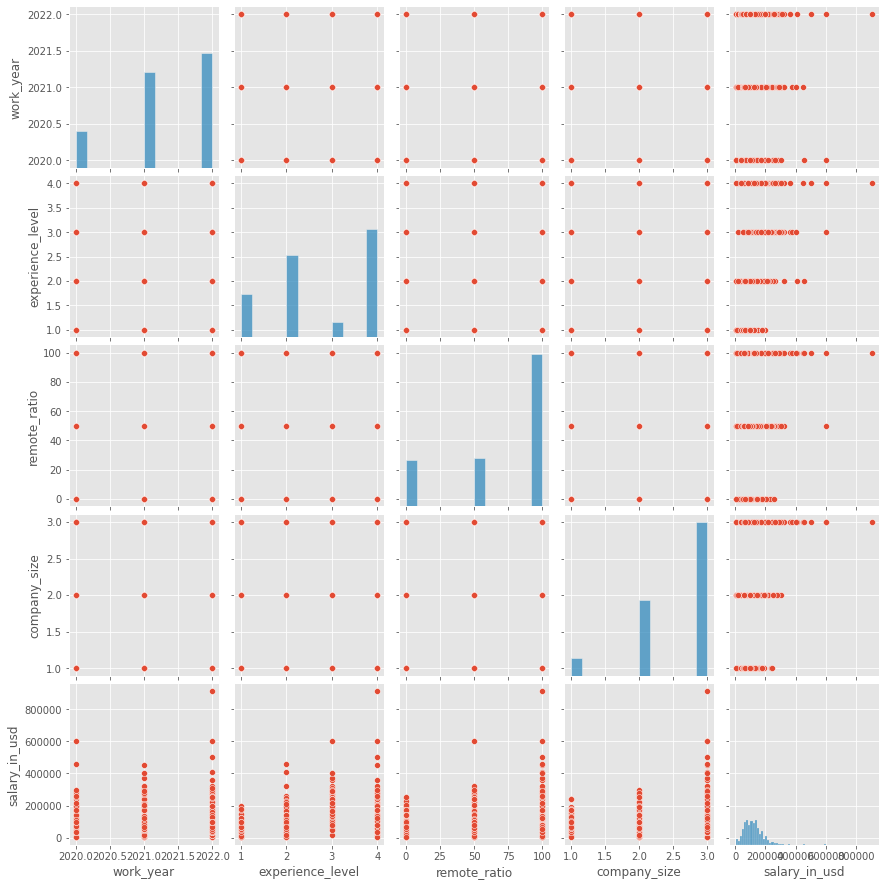

In [28]:
sns.pairplot(finaldf)


[Text(0.5, 1.0, 'Heatmap of Cyber Security Salaries - Pearson Correlations')]

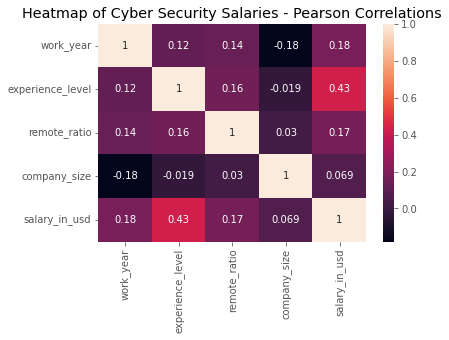

In [29]:
correlations = finaldf.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Cyber Security Salaries - Pearson Correlations')

# Multivaraible Regression Model

In [30]:
X=df[['work_year','experience_level','remote_ratio','company_size']]
y=df['salary_in_usd']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [33]:
print("Intercept:",model.intercept_)
print("Cofficients:",model.coef_)

Intercept: -29764126.869016636
Cofficients: [14732.05799724 23684.21073049   153.35231187 11842.78009552]


In [34]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
work_year,14732.057997
experience_level,23684.210730
remote_ratio,153.352312
company_size,11842.780096


# Model predictions

In [35]:
predictions = model.predict(x_test)

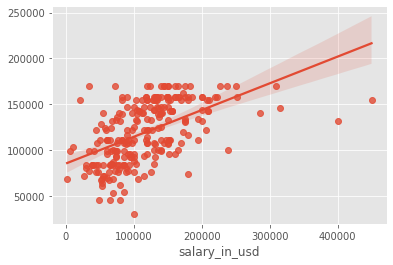

In [36]:
sns.regplot(x=y_test, y=predictions);


(array([ 4., 29., 98., 71., 37.,  5.,  3.,  1.,  0.,  2.]),
 array([-135262.81580772,  -92232.81000799,  -49202.80420827,
          -6172.79840854,   36857.20739118,   79887.21319091,
         122917.21899063,  165947.22479036,  208977.23059008,
         252007.23638981,  295037.24218953]),
 <a list of 10 Patch objects>)

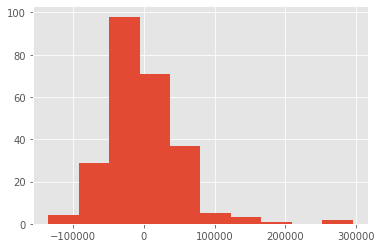

In [37]:
plt.hist(y_test - predictions)

# Metrics

In [38]:
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test, predictions))
print("MSE :",metrics.mean_squared_error(y_test, predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE : 35832.169486763356
MSE : 2591398126.362684
RMSE: 50905.77694488793
